Saving tested.csv to tested.csv
Shape:
 (418, 12)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None

Describe:

        PassengerId    Survived      Pclass                      Name   Sex  \
count    418.000000  418.000000  418.000000                       418   418   
unique     

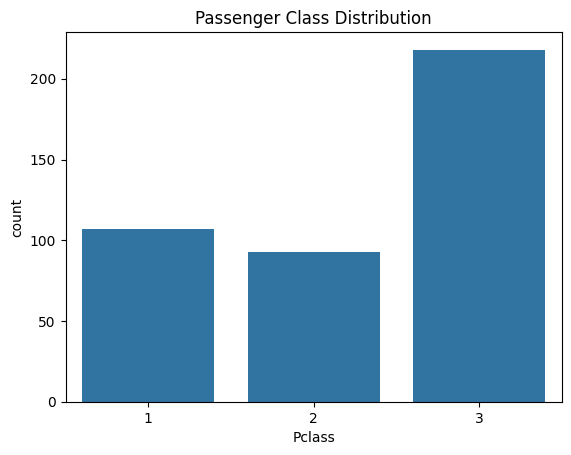


Female passengers who survived:
 1                     Wilkes, Mrs. James (Ellen Needs)
4         Hirvonen, Mrs. Alexander (Helga E Lindqvist)
6                                 Connolly, Miss. Kate
8            Abrahim, Mrs. Joseph (Sophie Halaut Easu)
12       Snyder, Mrs. John Pillsbury (Nelle Stevenson)
                            ...                       
409                          Peacock, Miss. Treasteall
410                             Naughton, Miss. Hannah
411    Minahan, Mrs. William Edward (Lillian E Thorpe)
412                     Henriksson, Miss. Jenny Lovisa
414                       Oliva y Ocana, Dona. Fermina
Name: Name, Length: 152, dtype: object

3rd class passengers under 18:
                                           Name    Age
5                   Svensson, Mr. Johan Cervin  14.00
21                   Olsen, Master. Artur Karl   9.00
55                        Rice, Master. Albert  10.00
60                             Dika, Mr. Mirko  17.00
80                 

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
df = pd.read_csv("tested.csv")
print("Shape:\n", df.shape)
print("\nInfo:\n")
print(df.info())
print("\nDescribe:\n")
print(df.describe(include='all'))
age_imputer = SimpleImputer(strategy='mean')
df['Age'] = age_imputer.fit_transform(df[['Age']])
df['Cabin'] = df['Cabin'].fillna("Unknown")
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)
sns.countplot(data=df, x='Pclass')
plt.title("Passenger Class Distribution")
plt.show()
female_survivors = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]
print("\nFemale passengers who survived:\n", female_survivors['Name'])
third_class_young = df[(df['Pclass'] == 3) & (df['Age'] < 18)]
print("\n3rd class passengers under 18:\n", third_class_young[['Name', 'Age']])
first_class_older = df[(df['Pclass'] == 1) & (df['Age'] > 40)]
print("\n1st class passengers older than 40:\n", first_class_older[['Name', 'Age']])
first_class_older_survived = first_class_older[first_class_older['Survived'] == 1]
print("\nSurvived from 1st class & older than 40:\n", first_class_older_survived[['Name', 'Age']])
high_fare_males = df[(df['Sex'] == 'male') & (df['Fare'] > 100)]
print("\nMale passengers who paid fare > 100:\n", high_fare_males[['Name', 'Fare']])
embarked_C_class2 = df[(df['Embarked'] == 'C') & (df['Pclass'] == 2)]
print("\nPassengers from port C and in Class 2:\n", embarked_C_class2[['Name', 'Embarked', 'Pclass']])
more_sibsp = df[df['SibSp'] > 2]
print("\nPassengers with SibSp > 2:\n", more_sibsp[['Name', 'SibSp']])
no_family_died = df[(df['Survived'] == 0) & (df['SibSp'] == 0) & (df['Parch'] == 0)]
print("\nPassengers who died with no family aboard:\n", no_family_died[['Name']])
oldest_survivors = df[df['Survived'] == 1].sort_values(by='Age', ascending=False).head(5)
print("\nTop 5 oldest survivors:\n", oldest_survivors[['Name', 'Age']])
free_fare_passengers = df[df['Fare'] == 0]
print("\nPassengers who paid zero fare:\n", free_fare_passengers[['Name', 'Fare']])
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
